## 1D random walks

In [256]:
import numpy as np
import matplotlib.pyplot as plt

savepath = "C:/Nicola/universita/Data_science/Labfisicacomputazionale/Assignment1/"

### (a) In order to follow the evolution of a random walk with the number of steps, calculate and plot the instantaneous position for runs corresponding to different seeds

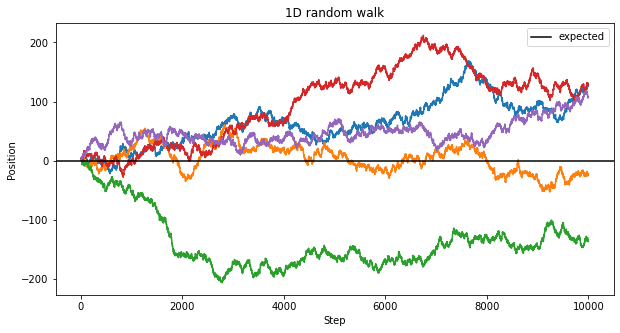

In [287]:
data = np.loadtxt('walkers.txt')

i = data[:, 0]
max_i = int(max(i))
x_i = data[:, 1]
x2_i = data[:, 2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
for j in range(int(len(i) / max_i)):
    plt.plot(i[j*max_i:(j+1)*max_i], x_i[j*max_i:(j+1)*max_i])

plt.axhline(y=0, color='black', label='expected')
plt.xlabel('Step')
plt.ylabel('Position')
plt.title("1D random walk")
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "1D_rw.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "1D_rw.pdf", dpi=300, bbox_inches="tight")
plt.show()

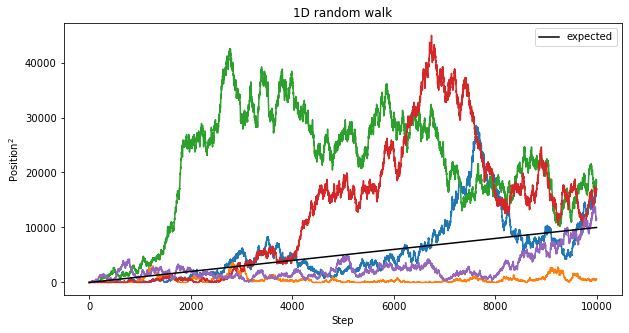

In [288]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
for j in range(int(len(i) / max_i)):
    plt.plot(i[j*max_i:(j+1)*max_i], x2_i[j*max_i:(j+1)*max_i])

plt.plot(i, i, label='expected', linestyle='-', color='black')
plt.xlabel('Step')
plt.ylabel('Position$^2$')
plt.title("1D random walk")
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "1D_rw2.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "1D_rw2.pdf", dpi=300, bbox_inches="tight")
plt.show()

### (b) Calculate now the averages over many walkers for the instantaneous quantities

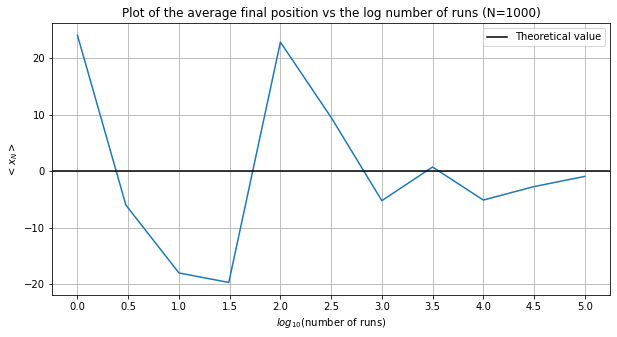

In [289]:
data = np.loadtxt('averages.txt')
runs = data[:, 1]
avgs = data[:, 2]
variances = data[:, 3]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log10(runs), avgs)
plt.xticks(np.linspace(0, 5, 11))
plt.axhline(y=0, color='black', label='Theoretical value')
plt.xlabel('$log_{10}$(number of runs)')
plt.ylabel('$<x_N>$')
plt.title('Plot of the average final position vs the log number of runs (N=1000)')
plt.grid()
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "xN.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "xN.pdf", dpi=300, bbox_inches="tight")
plt.show()

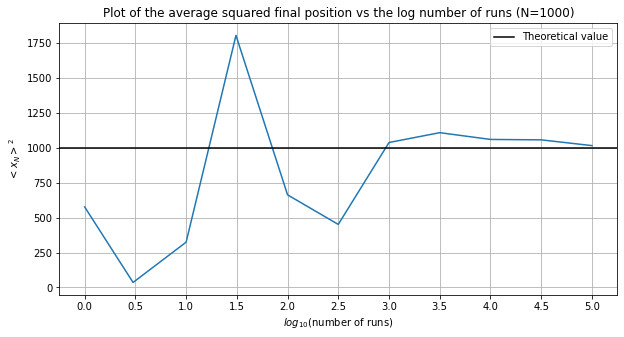

In [290]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.log10(runs), variances)
plt.xticks(np.linspace(0, 5, 11))
plt.axhline(y=1000, color='black', label='Theoretical value')
plt.xlabel('$log_{10}$(number of runs)')
plt.ylabel('$<x_N>^2$')
plt.title('Plot of the average squared final position vs the log number of runs (N=1000)')
plt.grid()
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "xN2.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "xN2.pdf", dpi=300, bbox_inches="tight")
plt.show()

### (b) same but now we fix the number of runs and let N vary

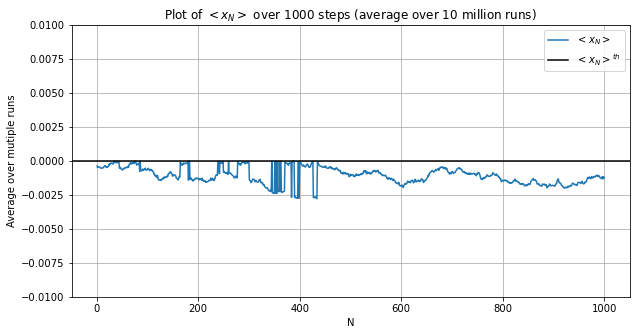

In [264]:
N = np.loadtxt('avg_walkers.txt')[:,0]
avg = np.loadtxt('avg_walkers.txt')[:,1]
sigma2 = np.loadtxt('avg_walkers.txt')[:,2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.ylim(-0.01,0.01)
plt.plot(N, avg, label='$<x_N>$')
plt.axhline(y=0, color='black', label='$<x_N>^{th}$')
plt.xlabel('N')
plt.ylabel('Average over mutiple runs')
plt.title('Plot of $<x_N>$ over 1000 steps (average over 10 million runs)')
plt.grid()
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "avg_walkers_avg.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "avg_walkers_avg.pdf", dpi=300, bbox_inches="tight")
plt.show()

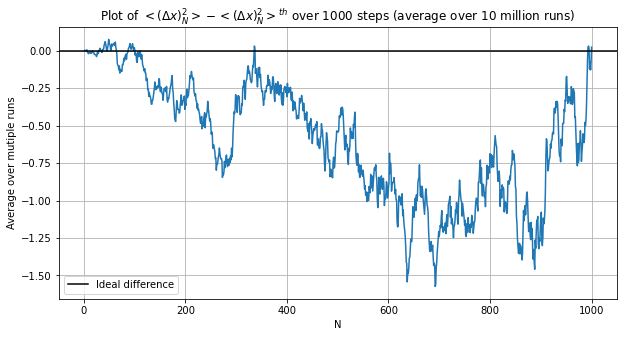

In [265]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(N, sigma2 - N)
plt.axhline(y=0, color='black', label='Ideal difference')
plt.xlabel('N')
plt.ylabel('Average over mutiple runs')
plt.title('Plot of $<(\Delta x)^2_N> - <(\Delta x)^2_N>^{th}$ over 1000 steps (average over 10 million runs)')
plt.grid()
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "avg_walkers_sigma2.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "avg_walkers_sigma2.pdf", dpi=300, bbox_inches="tight")
plt.show()

### (c) Calculate the accuracy of the mean square displacement, given by the relative deviation of the numerical value with respect to the theoretical value

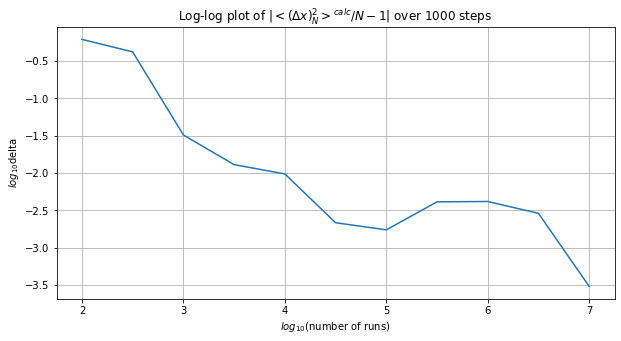

In [275]:
nruns = np.loadtxt('delta.txt')[:,1]
delta = np.loadtxt('delta.txt')[:,2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log10(nruns), np.log10(delta))
plt.xlabel('$log_{10}$(number of runs)')
plt.ylabel('$log_{10}$delta')
plt.title('Log-log plot of $|<(\Delta x)^2_N>^{calc} / N - 1|$ over 1000 steps')
plt.grid()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "delta.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "delta.pdf", dpi=300, bbox_inches="tight")
plt.show()

### (e) Determine the dependence of $<x_N>^2$ on N

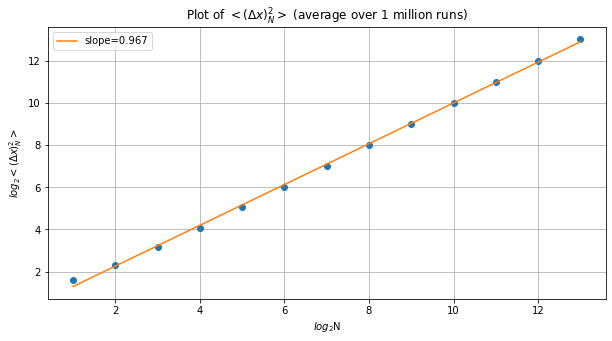

In [276]:
from sklearn.linear_model import LinearRegression
N = [2**i for i in range(1,14)]
sigma2 = np.loadtxt('avg_walkers2.txt')[N,2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log2(N), np.log2(sigma2), 'o')
plt.xlabel('$log_2$N')
plt.ylabel('$log_2<(\Delta x)^2_N>$')
plt.title('Plot of $<(\Delta x)^2_N>$ (average over 1 million runs)')
n_values = np.array(N).reshape(-1, 1)
reg = LinearRegression().fit(np.log2(n_values), np.log2(sigma2))
slope = reg.coef_[0]
intercept = reg.intercept_
x = np.log2(n_values)
y = slope * x + intercept
ax.plot(x, y, label = f"slope={round(slope, 3)}")
plt.grid()
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "loglogsigma2.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "loglogsigma2.pdf", dpi=300, bbox_inches="tight")
plt.show()

### (f-g) Insert in the program the calculation of the distribution $P_N(x)$ (numerically, from the simulation) and its expected behaviour; for sufficiently large N it can be approximated with the gaussian distribution (I used Stirling instead)

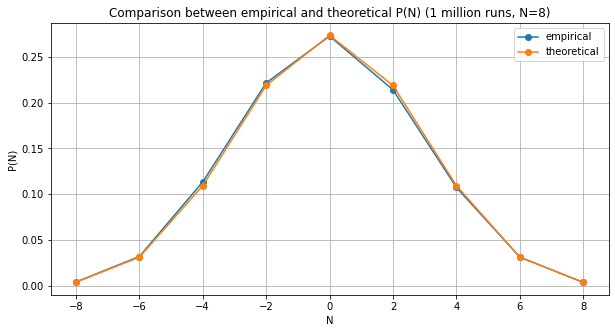

In [260]:
N = np.loadtxt('P_N.txt')[0::2, 0] # take only the even elements
P_N = np.loadtxt('P_N.txt')[0::2, 1]
P_N_th = np.loadtxt('P_N.txt')[0::2, 2]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(N, P_N, '-o', label='empirical')
plt.plot(N, P_N_th, '-o', label='theoretical')
plt.xlabel('N')
plt.ylabel('P(N)')
plt.title('Comparison between empirical and theoretical P(N) (1 million runs, N=8)')
plt.grid()
plt.legend()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "P_N8.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "P_N8.pdf", dpi=300, bbox_inches="tight")
plt.show()

### Scalability study (not required but still)

In [277]:
import pandas as pd

# Load the data from the file
n_procs = np.loadtxt('scalability.txt')[:,0]
comp = np.loadtxt('scalability.txt')[:,3]
comm = np.loadtxt('scalability.txt')[:,4]
writ = np.loadtxt('scalability.txt')[:,5]

data = pd.DataFrame({'group': n_procs, 'value': comp + comm + writ})

# Compute the group average and standard deviation
group_stats = data.groupby('group')['value'].agg(['mean', 'std'])

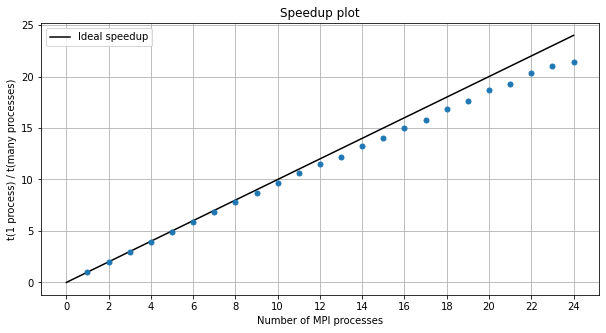

In [278]:
# Create a plot of the group mean with error bars
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.errorbar(group_stats.index, group_stats['mean'].iloc[0]/group_stats['mean'], 
             yerr=group_stats['std'], fmt='o',
             markersize=5)
plt.plot([0, max(group_stats.index)], [0, max(group_stats.index)], 'k-', label='Ideal speedup')
plt.xticks(np.arange(0, 25, 2))
plt.xlabel('Number of MPI processes')
plt.ylabel('t(1 process) / t(many processes)')
plt.title('Speedup plot')
plt.legend()
plt.grid()
plt.gcf().set_facecolor('white')
plt.savefig(savepath + "speedup.png", dpi=300, bbox_inches="tight")
plt.savefig(savepath + "speedup.pdf", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()